In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

from matplotlib.colors import LogNorm
from scipy import stats
from scipy.constants import h, c, e
from astropy.io import fits

# Photon per Second Calculation

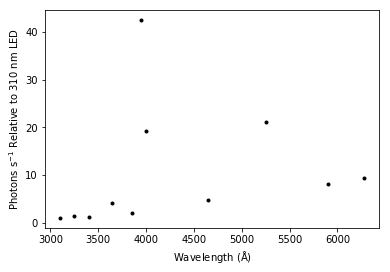

In [2]:
beam_angle = np.array([24, 24, 24, 15, 30, 30, 30, 60, 60, 60, 60])*(np.pi/180) # beam angle in radians
eta = np.array([90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90]) # efficacy of LEDs in lumens per watt (don't know actual efficacy of each LED)

omega = np.zeros(11) # array to fill with solid angle of each LED
for i in range(0, 11):
    omega[i] = 2*np.pi*(1-np.cos(beam_angle[i]/2))

omega_vis = np.array([omega[7], omega[8], omega[9], omega[10]]) # solid angle of visible LEDs in steradians
I_nu_vis = np.array([400, 1600, 550, 600]) # luminous intensity in mcd
phi = np.zeros(4) # luminous flux
power = np.zeros(4)

for i in range(0, 4):
    phi[i] = I_nu_vis[i]*omega_vis[i]/1000 # luminous flux in lumens
    power[i] = phi[i]/eta[i] # power in watts
    
wavelengths = np.array([310, 325, 340, 365, 385, 395, 400, 465, 525, 590, 628]) # wavelengths of all LEDs in nm
powers = np.array([0.0012, 0.0015, 0.0013, 0.0042, 0.002, 0.04, 0.0178, power[0], power[1], power[2], power[3]]) # power of all LEDs in watts

photon_energies = h*c/(wavelengths*10**(-9)) # energy of a single photon in Joules

photon_number = powers/photon_energies # photons per second

plt.plot(wavelengths*10, photon_number/photon_number[0], 'k.')
plt.xlabel(r'Wavelength $(\mathrm{\AA})$')
plt.ylabel(r'Photons s$^{-1}$ Relative to 310 nm LED')
plt.show()

# QE Analysis

In [ ]:
# data should look like qhy310_1s.fts, qhy310_2s.fts, ..., qhy 310_10s.fts, qhy325_1s.fts, ..., qhy628_10s.fts, pixis310_1s.fts, ..., pixis628_10s.fts (total of 200 fits files if going from 1s to 10s exposure times)

for i in wavelengths:
    for j in range(0, 10):
        locals()["qhy" + str(i) + '_' + str(j+1) + 's'] = fits.open('./qe_data/qhy' + str(i) + '_' + str(j+1) + 's.fts') # open all the fits files
        locals()["qhydata" + str(i) + '_' + str(j+1) + 's'] = locals()["qhy" + str(i) + '_' + str(j+1) + 's'][0].data # extract data from the fits files
        locals()["qhy" + str(i) + '_' + str(j+1) + 's'].close() # close fits files
        locals()["qhymed" + str(i) + '_' + str(j+1) + 's'] = np.median(locals()["qhydata" + str(i) + '_' + str(j+1) + 's']) # get median
    locals()["qhyx" + str(i)] = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]) # exposure time in seconds
    locals()["qhyy" + str(i)] = np.array([locals()["qhymed" + str(i) + '_1s'], locals()["qhymed" + str(i) + '_2s'], locals()["qhymed" + str(i) + '_3s'], locals()["qhymed" + str(i) + '_4s'], locals()["qhymed" + str(i) + '_5s'], locals()["qhymed" + str(i) + '_6s'], locals()["qhymed" + str(i) + '_7s'], locals()["qhymed" + str(i) + '_8s'], locals()["qhymed" + str(i) + '_9s'], locals()["qhymed" + str(i) + '_10s']]) # median ADU value for each exposure time
    locals()["qhycoef" + str(i)] = np.polyfit(locals()["qhyx" + str(i)], locals()["qhyy" + str(i)], 1) # fitting a line
    locals()["qhypoly1d" + str(i)] = np.poly1d(locals()["qhycoef" + str(i)])
    locals()["qhyslope" + str(i)], locals()["qhyintercept" + str(i)], locals()["qhyrvalue" + str(i)], locals()["qhypvalue" + str(i)], locals()["qhystderr" + str(i)] = scipy.stats.linregress(locals()["qhyx" + str(i)], locals()["qhyy" + str(i)]) # getting slope of linear fit, which tells us how many ADUs per second per pixel for each wavelength

In [ ]:
for i in wavelengths:
    for j in range(0, 10):
        locals()["pixis" + str(i) + '_' + str(j+1) + 's'] = fits.open('./qe_data/pixis' + str(i) + '_' + str(j+1) + 's.fts') # pixis data
        locals()["pixisdata" + str(i) + '_' + str(j+1) + 's'] = locals()["pixis" + str(i) + '_' + str(j+1) + 's'][0].data
        locals()["pixis" + str(i) + '_' + str(j+1) + 's'].close()
        locals()["pixismed" + str(i) + '_' + str(j+1) + 's'] = np.median(locals()["pixisdata" + str(i) + '_' + str(j+1) + 's'])
    locals()["pixisx" + str(i)] = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
    locals()["pixisy" + str(i)] = np.array([locals()["pixismed" + str(i) + '_1s'], locals()["pixismed" + str(i) + '_2s'], locals()["pixismed" + str(i) + '_3s'], locals()["pixismed" + str(i) + '_4s'], locals()["pixismed" + str(i) + '_5s'], locals()["pixismed" + str(i) + '_6s'], locals()["pixismed" + str(i) + '_7s'], locals()["pixismed" + str(i) + '_8s'], locals()["pixismed" + str(i) + '_9s'], locals()["pixismed" + str(i) + '_10s']])
    locals()["pixiscoef" + str(i)] = np.polyfit(locals()["pixisx" + str(i)], locals()["pixisy" + str(i)], 1)
    locals()["pixispoly1d" + str(i)] = np.poly1d(locals()["pixiscoef" + str(i)])
    locals()["pixisslope" + str(i)], locals()["pixisintercept" + str(i)], locals()["pixisrvalue" + str(i)], locals()["pixispvalue" + str(i)], locals()["pixisstderr" + str(i)] = scipy.stats.linregress(locals()["pixisx" + str(i)], locals()["pixisy" + str(i)])

In [ ]:
qhypixel = 3.76**2 # pixel size is 3.76x3.76 square micrometers
pixispixel = 20**2 # pixel size is 20x20 square micrometers

qhygain =  # number of electrons per ADU for QHY
pixisgain =  # number of electrons per ADU for Pixis

for i in wavelengths:
    locals()["qhyelectron" + str(i)] = locals()["qhyslope" + str(i)]*qhygain/qhypixel # number of electrons per second per square micrometer for QHY
    locals()["pixiselectron" + str(i)] = locals()["pixisslope" + str(i)]*pixisgain/pixispixel # number of electrons per second per square micrometer for Pixis
    locals()["ratio" + str(i)] = locals()["qhyelectron" + str(i)]/locals()["pixiselectron" + str(i)] # electron ratio

ratios = np.array([ratio310, ratio325, ratio340, ratio365, ratio385, ratio400, ratio465, ratio525, ratio590, ratio628]) # electron ratios in an array

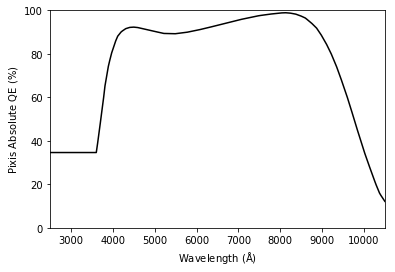

In [3]:
pixis_qe_data = np.loadtxt('pixis_qe_curve_data.txt', delimiter=',') # absolute quantum efficiency curve for Pixis
pixis_qe_data = np.transpose(pixis_qe_data)

pixis_qe = np.zeros(10) # array to fill with Pixis absolute QE values for each LED wavelength
for i in range(0, 10):
    pixis_qe[i] = np.interp(wavelengths[i], pixis_qe_data[0], pixis_qe_data[1])

plt.plot(pixis_qe_data[0]*10, pixis_qe_data[1], 'k')
plt.xlim(2500, 10500)
plt.ylim(0, 100)
plt.xlabel(r'Wavelength $(\mathrm{\AA})$')
plt.ylabel(r'Pixis Absolute QE $(\%)$')
plt.show()

In [ ]:
qhy_qe = ratios*pixis_qe # absolute QE for QHY as a percentage

plt.plot(wavelengths*10, qhy_qe, '.')
plt.xlabel(r'Wavelength $(\mathrm{\AA})$')
plt.ylabel(r'QHY600 Absolute QE $(\%)$')
plt.show()